In [130]:
import kagglehub

path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [131]:
import pandas as pd
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


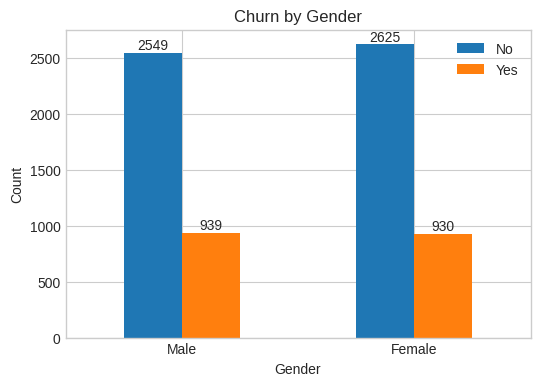

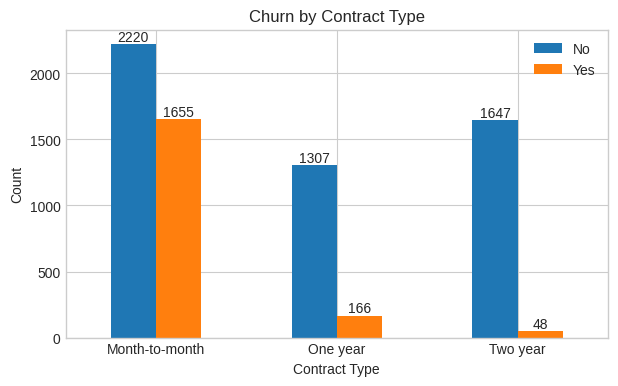

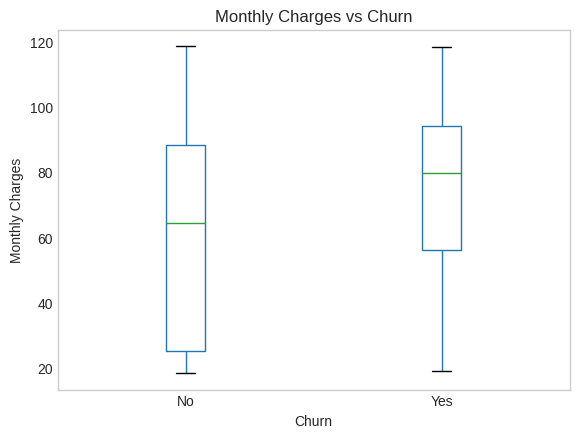

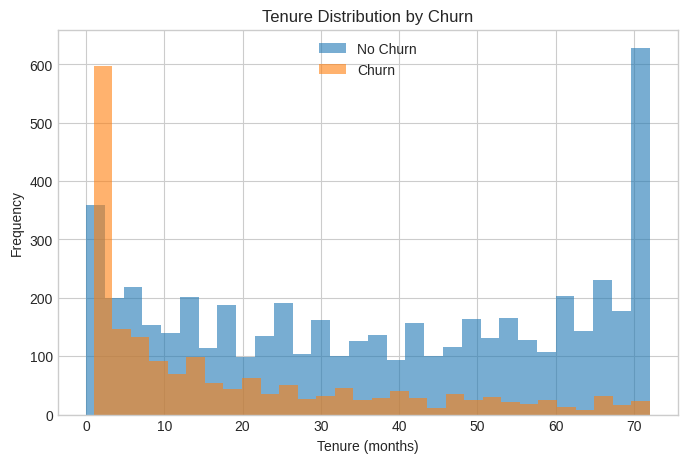

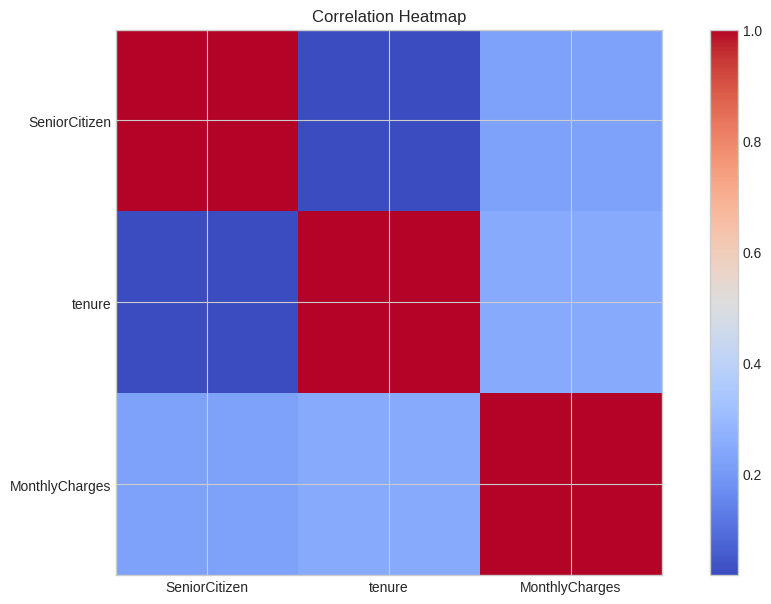

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# Churn by Gender
ax = pd.crosstab(df["gender"], df["Churn"]).plot(kind="bar", figsize=(6,4))
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(ticks = [0,1],  labels = ["Male","Female"], rotation=0)
plt.legend(labels=["No", "Yes"])

for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.show()

# Churn by Contract Type
ax = pd.crosstab(df["Contract"], df["Churn"]).plot(kind="bar", figsize=(7,4))
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(labels=["No", "Yes"])
for c in ax.containers:
    ax.bar_label(c, label_type='edge')
plt.show()

# Monthly Charges vs Churn
df.boxplot(column="MonthlyCharges", by="Churn", grid=False)
plt.title("Monthly Charges vs Churn")
plt.suptitle("")  # Remove automatic subtitle
plt.ylabel("Monthly Charges")
plt.show()

# Tenure Distribution by Churn
plt.figure(figsize=(8,5))
df[df["Churn"]=="No"]["tenure"].plot(kind="hist", bins=30, alpha=0.6, label="No Churn")
df[df["Churn"]=="Yes"]["tenure"].plot(kind="hist", bins=30, alpha=0.6, label="Churn")
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Correlation Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.tight_layout()
plt.title("Correlation Heatmap")
plt.show()

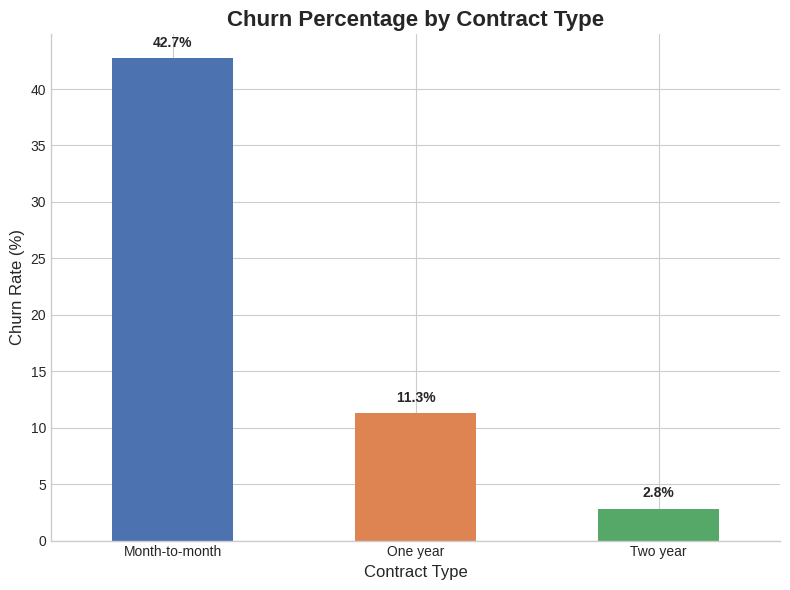

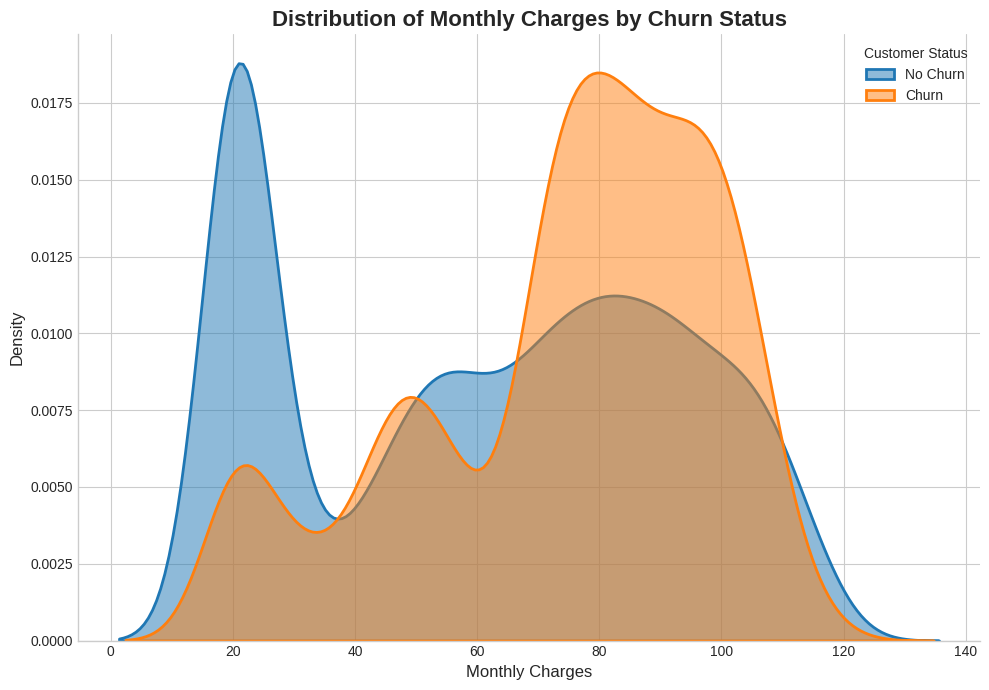

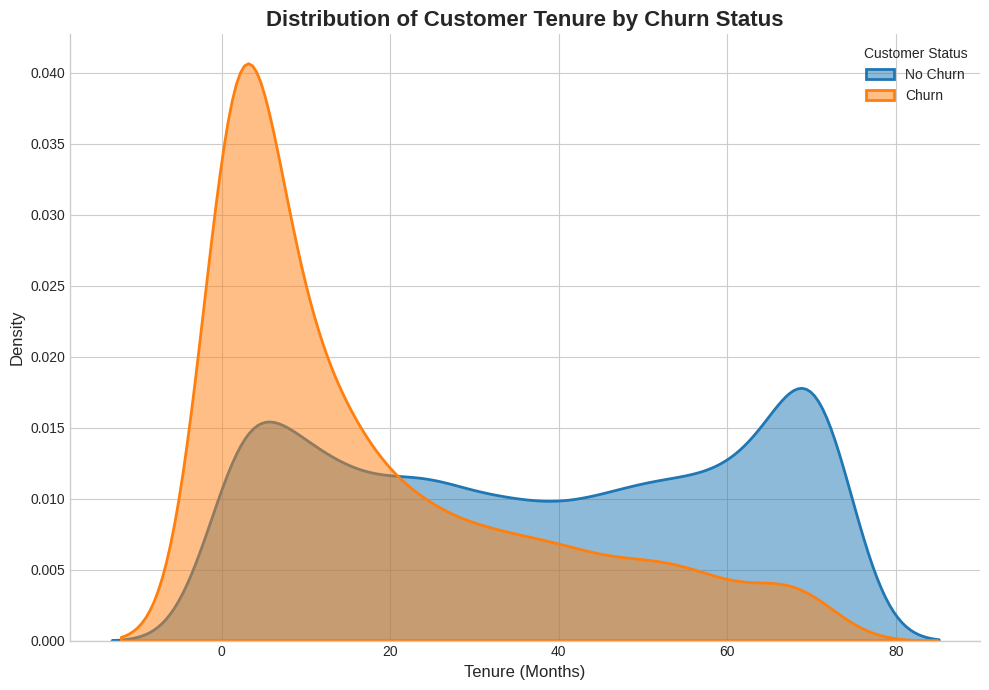

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_percentage = contract_churn['Yes'] * 100

churn_percentage.plot(kind='bar', ax=ax, color=['#4C72B0', '#DD8452', '#55A868'])
ax.set_title('Churn Percentage by Contract Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Contract Type', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, v in enumerate(churn_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# --- Plot 2: Churn Distribution by Monthly Charges ---
fig, ax = plt.subplots(figsize=(10, 7))

sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], label='No Churn', ax=ax, fill=True, alpha=0.5, linewidth=2)
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn', ax=ax, fill=True, alpha=0.5, linewidth=2)

ax.set_title('Distribution of Monthly Charges by Churn Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Monthly Charges', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend(title='Customer Status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


# --- Plot 3: Churn Distribution by Tenure ---
fig, ax = plt.subplots(figsize=(10, 7))

sns.kdeplot(df[df['Churn'] == 'No']['tenure'], label='No Churn', ax=ax, fill=True, alpha=0.5, linewidth=2)
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], label='Churn', ax=ax, fill=True, alpha=0.5, linewidth=2)

ax.set_title('Distribution of Customer Tenure by Churn Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Tenure (Months)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend(title='Customer Status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [134]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df.drop("customerID", axis=1, inplace=True)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df['TotalCharges'] = df['TotalCharges'].fillna(0)

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

binary_cols = ["gender", "Partner", "Dependents",
               "PhoneService", "PaperlessBilling", "Churn"]

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# 4. One-Hot Encoding for categorical features with 3+ categories
one_hot_cols = ["MultipleLines", "InternetService", "OnlineSecurity",
                "OnlineBackup", "DeviceProtection", "TechSupport",
                "StreamingTV", "StreamingMovies",
                "Contract", "PaymentMethod"]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)
print(df.head())
print(df.info())


   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -1.160323     -0.992611      0  ...   
1                 0       -0.259629     -0.172165      0  ...   
2                 1       -0.362660     -0.958066      1  ...   
3                 0       -0.746535     -0.193672      0  ...   
4                 1        0.197365     -0.938874      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            False        

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Features & target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409

XGBoost:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78   

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:57:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Logistic Regression Evaluation
Accuracy: 0.8211497515968772
Precision: 0.6861538461538461
Recall: 0.5978552278820375
F1 Score: 0.6389684813753582
ROC AUC: 0.7496998147132194

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



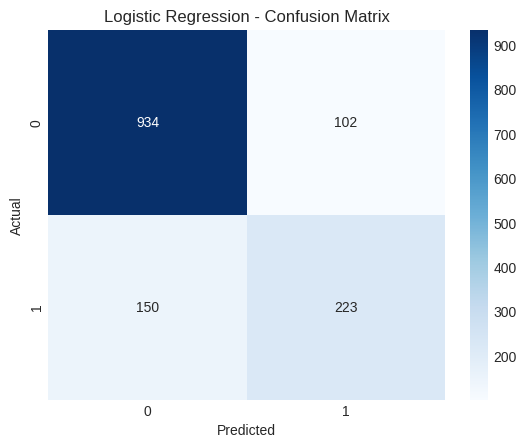


📊 Random Forest Evaluation
Accuracy: 0.7984386089425124
Precision: 0.6654275092936803
Recall: 0.47989276139410186
F1 Score: 0.557632398753894
ROC AUC: 0.6965100872607575

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



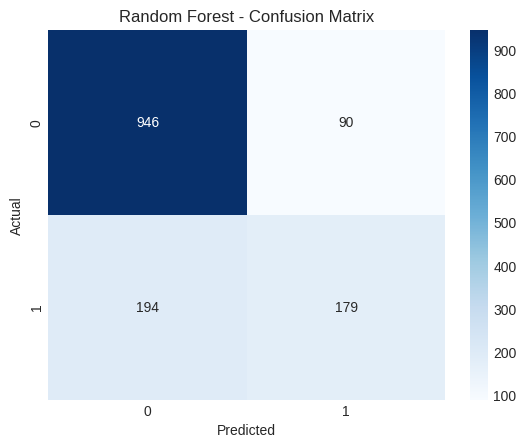

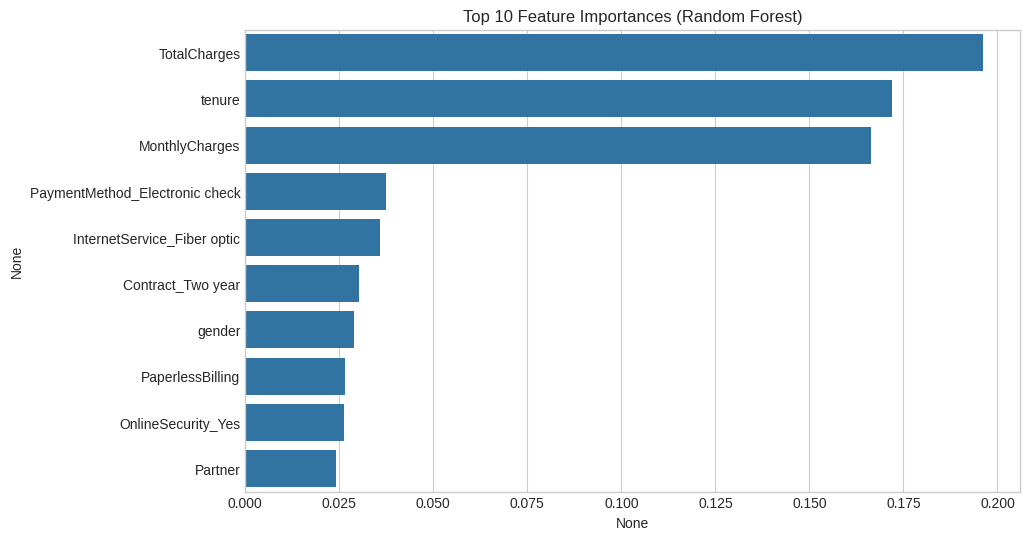

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

def evaluate_model(y_test, y_pred, model_name):
    print(f"\n📊 {model_name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# --------------------------------------------
# 7. Feature Importance (for Random Forest)
# --------------------------------------------
importances = rf.feature_importances_
feat_names = X.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [139]:
# --- THE FINAL SCRIPT: EXPORTING ALL ORIGINAL COLUMNS FOR POWER BI ---

# Load the original, raw dataset again
df_original = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Get a copy of all the original data for the customers in your test set
# This ensures we have every single original column (PhoneService, Partner, etc.)
dashboard_df = df_original.loc[X_test.index].copy()

# Drop the original 'Churn' column because we will add our own 'Actual_Churn' from y_test
dashboard_df.drop('Churn', axis=1, inplace=True)

# Add the actual churn values from the test set and the model's predictions
dashboard_df['Actual_Churn'] = y_test.values
dashboard_df['Predicted_Churn'] = y_pred_rf # Use predictions from your best model

# Save this final, complete data to a new CSV file
dashboard_df.to_csv('churn_dashboard_final_data.csv', index=False)


Successfully exported the final, complete dataset to 'churn_dashboard_final_data.csv'
This file contains ALL original columns. No more errors!
